# Section 4.4 — Regression with categorical predictors

This notebook contains the code examples from [Section 4.4 Regression with categorical predictors]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
# RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
RCPARAMS.update({'figure.figsize': (5, 1.6)})    # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/lm/categorical"

<Figure size 640x480 with 0 Axes>

In [3]:
# simple float __repr__
np.set_printoptions(legacy='1.25')

## Definitions

In [4]:
import pandas as pd
import statsmodels.formula.api as smf

### Design matrix for linear model `lm1`

In [5]:
students = pd.read_csv("../datasets/students.csv")
lm1 = smf.ols("score ~ 1 + effort", data=students).fit()
lm1.model.exog[0:3]

array([[ 1.  , 10.96],
       [ 1.  ,  8.69],
       [ 1.  ,  8.6 ]])

In [6]:
students["effort"].values[0:3]

array([10.96,  8.69,  8.6 ])

### Design matrix for linear model `lm2`

In [7]:
doctors = pd.read_csv("../datasets/doctors.csv")
formula = "score ~ 1 + alc + weed + exrc"
lm2  = smf.ols(formula, data=doctors).fit()
lm2.model.exog[0:3]

array([[ 1. ,  0. ,  5. ,  0. ],
       [ 1. , 20. ,  0. ,  4.5],
       [ 1. ,  1. ,  0. ,  7. ]])

In [8]:
doctors[["alc","weed","exrc"]].values[0:3]

array([[ 0. ,  5. ,  0. ],
       [20. ,  0. ,  4.5],
       [ 1. ,  0. ,  7. ]])

## Example 1: binary predictor variable

In [9]:
import statsmodels.formula.api as smf
lmloc = smf.ols("score ~ 1 + C(loc)", data=doctors).fit()
lmloc.params

Intercept        52.956522
C(loc)[T.urb]    -6.992885
dtype: float64

![Visualization of the results of the model `lmloc`.](./attachments/lm/doctors_scores_vs_loc_with_line.png)

In [10]:
rur_mean = doctors[doctors["loc"]=="rur"]["score"].mean()
urb_mean = doctors[doctors["loc"]=="urb"]["score"].mean()

rur_mean, urb_mean, urb_mean - rur_mean

(52.95652173913044, 45.96363636363636, -6.992885375494076)

### Encoding

In [11]:
doctors["loc"][0:5]

0    rur
1    urb
2    urb
3    urb
4    rur
Name: loc, dtype: object

In [12]:
lmloc.model.exog[0:5]

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.]])

In [13]:
# ALT.
# dmatrix("1 + C(loc)", doctors)[0:5]

## Dummy coding for categorical predictors

In [14]:
cats = ["A", "B", "C", "C"]
catdf = pd.DataFrame({"cat":cats})
catdf

,cat
0,A
1,B
2,C
3,C


In [15]:
from patsy import dmatrix

dmatrix("1 + C(cat)", data=catdf)

DesignMatrix with shape (4, 3)
  Intercept  C(cat)[T.B]  C(cat)[T.C]
          1            0            0
          1            1            0
          1            0            1
          1            0            1
  Terms:
    'Intercept' (column 0)
    'C(cat)' (columns 1:3)

## Example 2: predictors with three levels

In [16]:
doctors = pd.read_csv("../datasets/doctors.csv")
doctors["work"].head(5)

0    hos
1    cli
2    hos
3    eld
4    cli
Name: work, dtype: object

In [17]:
dmatrix("1 + C(work)", data=doctors)[0:5]

array([[1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 0.]])

In [18]:
lmw = smf.ols("score ~ 1 + C(work)", data=doctors).fit()
lmw.params

Intercept         46.545455
C(work)[T.eld]     4.569930
C(work)[T.hos]     2.668831
dtype: float64

![Visualization of the estimated parameters of the model `lmw`.](./attachments/lm/doctors_scores_vs_work_with_lines.png)

In [19]:
lmw.rsquared

0.0077217625749193

In [20]:
lmw.fvalue, lmw.f_pvalue

(0.5953116925291129, 0.5526627461285702)

## Example 3: improved model for the sleep scores

We can mix of numerical and categorical predictors

In [21]:
formula3 = "score ~ 1 + alc + weed + exrc + C(loc)"
lm3 = smf.ols(formula3, data=doctors).fit()
lm3.params

Intercept        63.606961
C(loc)[T.urb]    -5.002404
alc              -1.784915
weed             -0.840668
exrc              1.783107
dtype: float64

In [22]:
lm3.rsquared, lm3.aic

(0.8544615790287665, 1092.5985552344712)

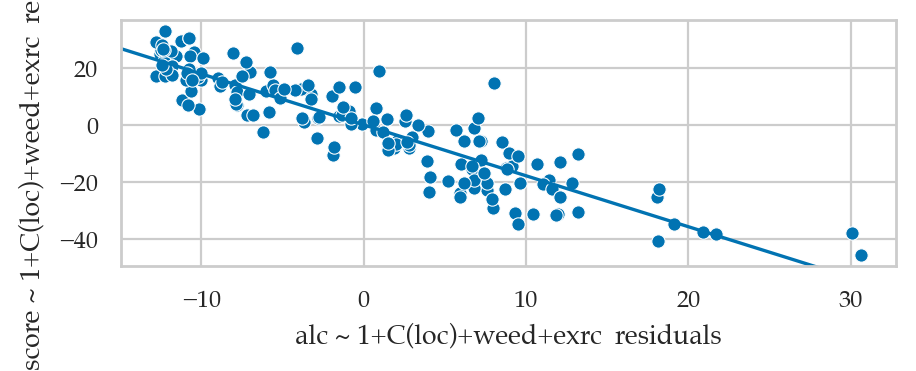

In [23]:
from ministats import plot_partreg

plot_partreg(lm3, "alc");

In [24]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     221.6
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           4.18e-62
Time:                        11:03:53   Log-Likelihood:                -541.30
No. Observations:                 156   AIC:                             1093.
Df Residuals:                     151   BIC:                             1108.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        63.6070      1.524     41.734      0.000      60.596      66.618
C(loc)[T.urb]    -5.0024      1.401     -3.572      0.000      -7.770      -2.235
alc              -1.7849      0.068    -26.424      0.000      -1.918      -1.651
weed             -0.8407      0.462     -1.821      0.071      -1.753       0.071
exrc              1.7831      0.133     13.400      0.000       1.520       2.046
==============================================================================
Omnibus:                        4.325   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                4.038
Skew:                           0.279   Prob(JB):                        0.133
Kurtosis:                       3.556   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Compare to the model without `loc` predictor

In [25]:
formula2 = "score ~ 1 + alc + weed + exrc"
lm2 = smf.ols(formula2, data=doctors).fit()
F, p, _ = lm3.compare_f_test(lm2)
F, p

(12.758115596295536, 0.00047598123084920574)

## Everything is a linear model

### One-sample t-test as a linear model

In [26]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample04 = kombucha[kombucha["batch"]==4]["volume"]
ksample04.mean()

1003.8335

In [27]:
from scipy.stats import ttest_1samp
resk = ttest_1samp(ksample04, popmean=1000)
resk.statistic, resk.pvalue

(3.087703149420272, 0.0037056653503329626)

In [28]:
# # ALT. using the helper function from `ministats`
# from ministats import ttest_mean
# ttest_mean(ksample04, mu0=1000)

In [29]:
# Prepare zero-centered data (volume - 1000)
kdat04 = pd.DataFrame()
kdat04["zcvolume"] = ksample04 - 1000

# Fit linear model with only an intercept term
import statsmodels.formula.api as smf
lmk = smf.ols("zcvolume ~ 1", data=kdat04).fit()
lmk.params

Intercept    3.8335
dtype: float64

In [30]:
lmk.tvalues.iloc[0], lmk.pvalues.iloc[0]

(3.0877031494203044, 0.0037056653503326335)

### Two-sample t-test as a linear model

#### East vs. West electricity prices

In [31]:
eprices = pd.read_csv("../datasets/eprices.csv")
pricesW = eprices[eprices["loc"]=="West"]["price"]
pricesE = eprices[eprices["loc"]=="East"]["price"]
pricesW.mean() - pricesE.mean()

3.000000000000001

#### Two-sample t-test with pooled variance

In [32]:
from scipy.stats import ttest_ind
rese = ttest_ind(pricesW, pricesE, equal_var=True)
rese.statistic, rese.pvalue

(5.022875513276465, 0.00012497067987678488)

In [33]:
ci_Delta = rese.confidence_interval(confidence_level=0.9)
[ci_Delta.low, ci_Delta.high]

[1.957240525873166, 4.042759474126836]

#### Linear model approach

In [34]:
lme = smf.ols("price ~ 1 + C(loc)", data=eprices).fit()
print(lme.params)
lme.tvalues.iloc[1], lme.pvalues.iloc[1]

Intercept         6.155556
C(loc)[T.West]    3.000000
dtype: float64


(5.022875513276466, 0.00012497067987678464)

In [35]:
lme.conf_int(alpha=0.1).iloc[1].values

array([1.95724053, 4.04275947])

![Visualization of the comparison between the two groups.](./attachments/lm/plot_lm_ttest_for_eprices.png)

#### Example 1 (revisited): urban vs. rural doctors

In [36]:
from scipy.stats import ttest_ind

scoresR = doctors[doctors["loc"]=="rur"]["score"]
scoresU = doctors[doctors["loc"]=="urb"]["score"]

resloc = ttest_ind(scoresU, scoresR, equal_var=True)
resloc.statistic, resloc.pvalue

(-1.9657612140164198, 0.05112460353979368)

In [37]:
lmloc = smf.ols("score ~ 1 + C(loc)", data=doctors).fit()
lmloc.tvalues.iloc[1], lmloc.pvalues.iloc[1]

(-1.9657612140164178, 0.05112460353979391)

### One-way ANOVA as a linear model

In [38]:
from scipy.stats import f_oneway

scoresH = doctors[doctors["work"]=="hos"]["score"]
scoresC = doctors[doctors["work"]=="cli"]["score"]
scoresE = doctors[doctors["work"]=="eld"]["score"]

resw = f_oneway(scoresH, scoresC, scoresE)
resw.statistic, resw.pvalue

(0.5953116925291181, 0.5526627461285608)

In [39]:
lmw = smf.ols("score ~ 1 + C(work)", data=doctors).fit()
print(lmw.params)
lmw.fvalue, lmw.f_pvalue

Intercept         46.545455
C(work)[T.eld]     4.569930
C(work)[T.hos]     2.668831
dtype: float64


(0.5953116925291129, 0.5526627461285702)

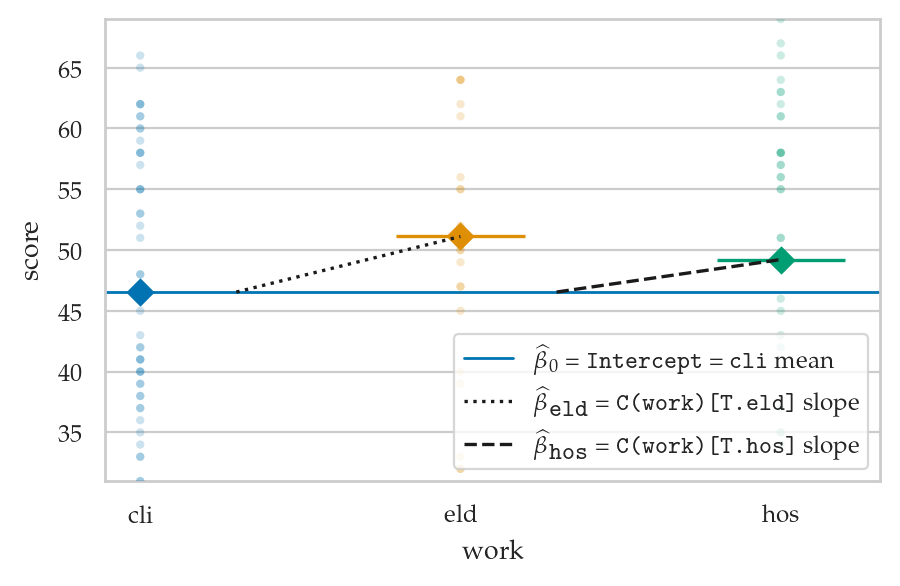

In [40]:
from ministats.plots.figures import plot_lm_anova

with plt.rc_context({"figure.figsize":(5,3), "text.usetex":True}):
    ax = plot_lm_anova(doctors, x="work", y="score")
    ax.set_ylim([31,69])    
    sns.move_legend(ax, "lower right")

In [41]:
# BONUS: print ANOVA table
# import statsmodels.api as sm
# sm.stats.anova_lm(lmw)

### Nonparametric tests

#### One-sample Wilcoxon signed-rank test

In [42]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample04 = kombucha[kombucha["batch"]==4]["volume"]

# Zero-centered volumes
zcksample04 = ksample04 - 1000

from scipy.stats import wilcoxon
reswil = wilcoxon(zcksample04)
reswil.pvalue

0.002770629538645153

In [43]:
# Create a new data frame with the signed ranks of the volumes
df_zcsr = pd.DataFrame()
df_zcsr["zcvolume_sr"] = np.sign(zcksample04) * zcksample04.abs().rank()

lmwil = smf.ols("zcvolume_sr ~ 1", data=df_zcsr).fit()
lmwil.pvalues.iloc[0]

0.0022841508459744125

#### Mann-Whitney U-test

In [44]:
scoresR = doctors[doctors["loc"]=="rur"]["score"]
scoresU = doctors[doctors["loc"]=="urb"]["score"]

from scipy.stats import mannwhitneyu
resmwu = mannwhitneyu(scoresU, scoresR)
resmwu.pvalue

0.05008336985073764

In [45]:
# Compute the (unsigned) ranks of the scores
doctors["score_r"] = doctors["score"].rank()

# Fit a linear model
lmmwu = smf.ols("score_r ~ 1 + C(loc)", data=doctors).fit()
lmmwu.pvalues.iloc[1]

0.049533887469989255

#### Kruskal-Wallis analysis of variance by ranks

In [46]:
from scipy.stats import kruskal
reskw = kruskal(scoresH, scoresC, scoresE)
reskw.pvalue

0.4441051932875236

In [47]:
# Compute the (unsigned) ranks of the scores
doctors["score_r"] = doctors["score"].rank()  

lmkw = smf.ols("score_r ~ 1 + C(work)", data=doctors).fit()
lmkw.f_pvalue

0.44688872149660885

## Explanations

### Dummy coding options

In [48]:
dmatrix("cat", data=catdf)

DesignMatrix with shape (4, 3)
  Intercept  cat[T.B]  cat[T.C]
          1         0         0
          1         1         0
          1         0         1
          1         0         1
  Terms:
    'Intercept' (column 0)
    'cat' (columns 1:3)

In [49]:
dmatrix("C(cat)", data=catdf)

DesignMatrix with shape (4, 3)
  Intercept  C(cat)[T.B]  C(cat)[T.C]
          1            0            0
          1            1            0
          1            0            1
          1            0            1
  Terms:
    'Intercept' (column 0)
    'C(cat)' (columns 1:3)

In [50]:
dmatrix("C(cat, Treatment)", data=catdf)

DesignMatrix with shape (4, 3)
  Intercept  C(cat, Treatment)[T.B]  C(cat, Treatment)[T.C]
          1                       0                       0
          1                       1                       0
          1                       0                       1
          1                       0                       1
  Terms:
    'Intercept' (column 0)
    'C(cat, Treatment)' (columns 1:3)

In [51]:
dmatrix("C(cat, Treatment('B'))", data=catdf)
# ALT. dmatrix("C(cat, Treatment(1))", data=catdf)

DesignMatrix with shape (4, 3)
  Intercept  C(cat, Treatment('B'))[T.A]  C(cat, Treatment('B'))[T.C]
          1                            1                            0
          1                            0                            0
          1                            0                            1
          1                            0                            1
  Terms:
    'Intercept' (column 0)
    "C(cat, Treatment('B'))" (columns 1:3)

### Avoiding perfect collinearity

In [52]:
df_col = pd.DataFrame()
df_col["iscli"] = (doctors["work"] == "cli").astype(int)
df_col["iseld"] = (doctors["work"] == "eld").astype(int)
df_col["ishos"] = (doctors["work"] == "hos").astype(int)
df_col["score"] = doctors["score"]

In [53]:
formula_col = "score ~ 1 + iscli + iseld + ishos"
lm_col = smf.ols(formula_col, data=df_col).fit()
lm_col.params

Intercept    36.718781
iscli         9.826673
iseld        14.396603
ishos        12.495504
dtype: float64

In [54]:
lm_col.condition_number

4496839867074116.0

In [55]:
lm2.params

Intercept    60.452901
alc          -1.800101
weed         -1.021552
exrc          1.768289
dtype: float64

## Discussion

### Other coding strategies for categorical variables

In [56]:
dmatrix("0 + C(cat)", data=catdf)

DesignMatrix with shape (4, 3)
  C(cat)[A]  C(cat)[B]  C(cat)[C]
          1          0          0
          0          1          0
          0          0          1
          0          0          1
  Terms:
    'C(cat)' (columns 0:3)

In [57]:
dmatrix("1 + C(cat, Sum)", data=catdf)

DesignMatrix with shape (4, 3)
  Intercept  C(cat, Sum)[S.A]  C(cat, Sum)[S.B]
          1                 1                 0
          1                 0                 1
          1                -1                -1
          1                -1                -1
  Terms:
    'Intercept' (column 0)
    'C(cat, Sum)' (columns 1:3)

In [58]:
dmatrix("1+C(cat, Diff)", data=catdf)

DesignMatrix with shape (4, 3)
  Intercept  C(cat, Diff)[D.A]  C(cat, Diff)[D.B]
          1           -0.66667           -0.33333
          1            0.33333           -0.33333
          1            0.33333            0.66667
          1            0.33333            0.66667
  Terms:
    'Intercept' (column 0)
    'C(cat, Diff)' (columns 1:3)

In [59]:
dmatrix("C(cat, Helmert)", data=catdf)

DesignMatrix with shape (4, 3)
  Intercept  C(cat, Helmert)[H.B]  C(cat, Helmert)[H.C]
          1                    -1                    -1
          1                     1                    -1
          1                     0                     2
          1                     0                     2
  Terms:
    'Intercept' (column 0)
    'C(cat, Helmert)' (columns 1:3)

## Exercises

### EXX: redo comparison of debate and lectures scores

In [60]:
students = pd.read_csv("../datasets/students.csv")
lmcu = smf.ols("score ~ 1 + C(curriculum)", data=students).fit()
lmcu.tvalues.iloc[1], lmcu.pvalues.iloc[1]

(-1.7197867420465645, 0.10917234443214417)

### EXX: model comparison

In [61]:
formula3w = "score ~ 1 + alc + weed + exrc + C(loc) + C(work)"
lm3w = smf.ols(formula3w, data=doctors).fit()

formula3 = "score ~ 1 + alc + weed + exrc + C(loc)"
lm3 = smf.ols(formula3, data=doctors).fit()

lm3w.compare_f_test(lm3)

(1.5158185269522728, 0.22299549360240853, 2.0)

The result is non-significant which means including the predictor `C(work)`
in the model is not useful.

### EXX: run ANOVA test

107.22963883851017 3.091116115443299e-27


(107.22963883851006, 3.091116115443401e-27)

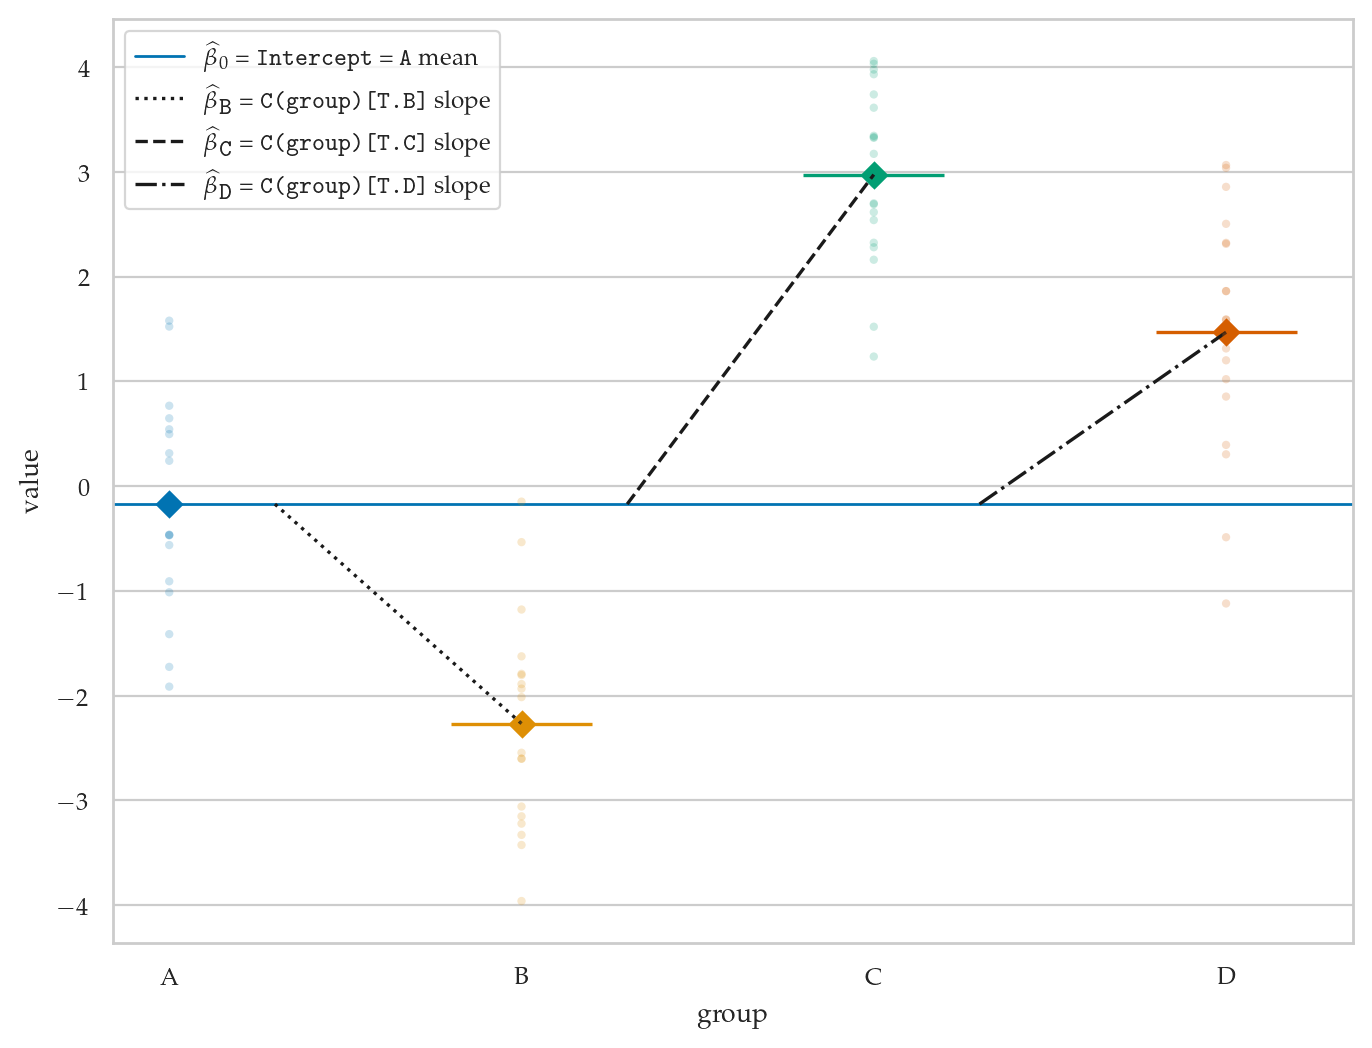

In [62]:
# Construct data as a pd.DataFrame
np.random.seed(42)
As = np.random.normal(0, 1, 20)
Bs = np.random.normal(-2, 1, 20)
Cs = np.random.normal(3, 1, 20)
Ds = np.random.normal(1.5, 1, 20)

dfABCD = pd.DataFrame()
dfABCD["group"] = ["A"]*20 + ["B"]*20 + ["C"]*20 + ["D"]*20
dfABCD["value"] = np.concatenate([As, Bs, Cs, Ds])

with plt.rc_context({"figure.figsize":(8,6), "text.usetex":True}):
    ax = plot_lm_anova(dfABCD, x="group", y="value")

from scipy.stats import f_oneway
resABCD = f_oneway(As, Bs, Cs, Ds)
print(resABCD.statistic, resABCD.pvalue)

lmabcd =  smf.ols("value ~ C(group)", data=dfABCD).fit()
lmabcd.fvalue, lmabcd.f_pvalue

## Links

- Patsy and Statsmodels  https://www.youtube.com/watch?v=iEANEcWqAx4 
- Tests as LMs: https://lindeloev.github.io/tests-as-linear/
- https://stats.stackexchange.com/questions/59047/how-are-regression-the-t-test-and-the-anova-all-versions-of-the-general-linear
- https://danielroelfs.com/blog/everything-is-a-linear-model/ via [HN](https://news.ycombinator.com/item?id=39420111)